# 0. Loading row data

In [1]:
import os
import pandas as pd

CARS_PATH = 'data'

def load_cars_data(cars_path=CARS_PATH):
    csv_path = os.path.join(cars_path, 'car_data.csv')
    return pd.read_csv(csv_path)

cars = load_cars_data()
cars.head()

,Unnamed: 0,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,NaN,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,sedan,grey,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,4,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,NaN,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 25 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   city          object 
 2   price         int64  
 3   year          float64
 4   manufacturer  object 
 5   make          object 
 6   condition     object 
 7   cylinders     object 
 8   fuel          object 
 9   odometer      float64
 10  title_status  object 
 11  transmission  object 
 12  vin           object 
 13  drive         object 
 14  size          object 
 15  type          object 
 16  paint_color   object 
 17  lat           float64
 18  long          float64
 19  county_fips   float64
 20  county_name   object 
 21  state_fips    float64
 22  state_code    object 
 23  state_name    object 
 24  weather       float64
dtypes: float64(7), int64(2), object(16)
memory usage: 328.6+ MB


In [3]:
cars.keys()

Index(['Unnamed: 0', 'city', 'price', 'year', 'manufacturer', 'make',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color', 'lat',
       'long', 'county_fips', 'county_name', 'state_fips', 'state_code',
       'state_name', 'weather'],
      dtype='object')

# 1. Data cleaning
### Drop unnecessary columns
After a preliminary analysis of the available features, it has been decided to drop unnecessary columns:<br>
-Unnamed: 0 (index column)<br>
-city<br>
-vin<br>
-paint_color<br>
-lat<br>
-long<br>
-county_fips<br>
-county_name<br>
-state_fips<br>
-state_code<br>
-state_name<br>
-weather<br>


In [4]:
col_to_drop = [
    'Unnamed: 0',
    'city',
    'vin',
    'paint_color',
    'lat',
    'long',
    'county_fips',
    'county_name',
    'state_fips',
    'state_code',
    'state_name',
    'weather',
]
cars = cars.drop(columns=col_to_drop)
cars

,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type
0,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,automatic,rwd,NaN,coupe
1,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN
2,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN
3,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,automatic,fwd,full-size,sedan
4,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,automatic,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723060,8450,2005.0,NaN,NICE,like new,8 cylinders,gas,162000.0,clean,automatic,4wd,NaN,NaN
1723061,6000,2005.0,chevy,avalanche,good,8 cylinders,gas,NaN,clean,automatic,4wd,NaN,NaN
1723062,1500,2007.0,volkswagen,jetta sedan,NaN,NaN,gas,0.0,clean,automatic,NaN,NaN,NaN
1723063,4788,2009.0,toyota,camry,good,4 cylinders,gas,210682.0,clean,automatic,fwd,mid-size,sedan


### Exploration of features

In [5]:
def calculate_cars_nan_values():
    return cars.isna().sum()

def calculate_cars_nan_values_percent():
    return calculate_cars_nan_values() / len(cars) * 100

cars_nan_values_percent = calculate_cars_nan_values_percent()
pd.DataFrame({'NaN values [%]' : round(cars_nan_values_percent, 2), 'Data type': cars.dtypes})

,NaN values [%],Data type
price,0.00,int64
year,0.37,float64
manufacturer,7.92,object
make,4.05,object
condition,40.67,object
cylinders,40.12,object
fuel,0.60,object
odometer,32.74,float64
title_status,0.15,object
transmission,0.52,object


6 features describe a high percentage of missing data.<br>
Let's take a closer look at all features.

###### Feature: price


Labels of cars data set.

###### Feature: year


In [6]:
print("Number of NaN values: ", calculate_cars_nan_values().year)

Number of NaN values:  6315


Can't fill missing values based on other features.<br>
Rows with NaN values will be dropped.

In [7]:
cars.dropna(subset=['year'], inplace=True)

###### Feature: manufacturer


In [8]:
print("Number of NaN values: ", calculate_cars_nan_values().manufacturer)

Number of NaN values:  135406


In [9]:
cars.manufacturer.describe()

count     1581344
unique         53
top          ford
freq       291783
Name: manufacturer, dtype: object

In [10]:
cars.manufacturer.value_counts()

ford               291783
chevrolet          219221
toyota             116288
honda               89261
nissan              79772
dodge               76008
jeep                74763
gmc                 69716
ram                 56677
bmw                 43267
chevy               40509
volkswagen          33529
hyundai             33267
chrysler            31453
subaru              29339
cadillac            25174
kia                 24927
mercedes-benz       24037
mazda               23422
buick               22827
pontiac             22324
lexus               20364
acura               18062
audi                15136
lincoln             12853
infiniti            12084
volvo               11220
mitsubishi          10976
mercury             10273
saturn               9358
mercedes             7193
mini                 6431
rover                5454
vw                   4476
jaguar               4296
fiat                 2005
chev                  854
datsun                604
harley-david

There is no single dominant value. Can't fill missing values based on other features.<br>
Rows with NaN values will be dropped.

In [11]:
cars.dropna(subset=['manufacturer'], inplace=True)

###### Feature: make

In [12]:
print("Number of NaN values: ", calculate_cars_nan_values().make)

Number of NaN values:  69401


In [13]:
cars.make.describe()

count     1511943
unique      62017
top          1500
freq        23171
Name: make, dtype: object

In [14]:
cars.make.value_counts()

1500                        23171
f-150                       22125
silverado 1500              15221
2500                        13216
mustang                     13026
                            ...  
grabd cherokee laredo           1
liberty colorado edition        1
grand am.                       1
c320 awd gas sedan              1
legacy 2.0 gt                   1
Name: make, Length: 62017, dtype: int64

There is no single dominant value. Can't fill missing values based on other features.<br>
Rows with NaN values will be dropped.

In [15]:
cars.dropna(subset=['make'], inplace=True)

###### Feature: condition

<BarContainer object of 6 artists>

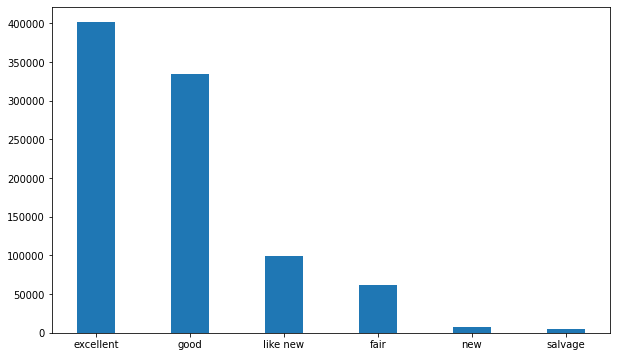

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(cars.condition.value_counts().keys(), cars.condition.value_counts(), width=0.4)

In [17]:
print("Number of NaN values: ", calculate_cars_nan_values().condition)

Number of NaN values:  602965


In [18]:
cars.condition.describe()

count        908978
unique            6
top       excellent
freq         401481
Name: condition, dtype: object

In [19]:
cars.condition.value_counts()

excellent    401481
good         334178
like new      99225
fair          62244
new            6924
salvage        4926
Name: condition, dtype: int64

There is no single dominant value.
Can't fill missing values based on other features.<br>
There are many NaN values, but it seems to be important feature.<br>
Rows with NaN values will be dropped.

In [20]:
cars.dropna(subset=['condition'], inplace=True)

###### Feature: cylinders

<BarContainer object of 8 artists>

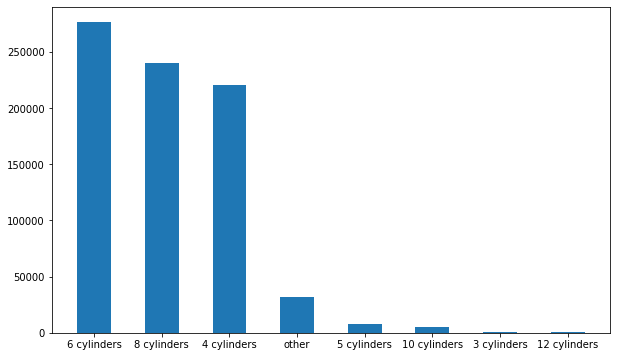

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(cars.cylinders.value_counts().keys(), cars.cylinders.value_counts(), width=0.5)

In [22]:
print("Number of NaN values: ", calculate_cars_nan_values().cylinders)

Number of NaN values:  126141


In [23]:
cars.cylinders.describe()

count          782837
unique              8
top       6 cylinders
freq           276371
Name: cylinders, dtype: object

In [24]:
cars.cylinders.value_counts()

6 cylinders     276371
8 cylinders     239930
4 cylinders     220501
other            32210
5 cylinders       7395
10 cylinders      4994
3 cylinders        937
12 cylinders       499
Name: cylinders, dtype: int64

There is no single dominant value. Can't fill missing values base on other features.<br>
Too many NaN values, column will be dropped.

In [25]:
cars = cars.drop(columns='cylinders')

###### Feature: fuel

<BarContainer object of 5 artists>

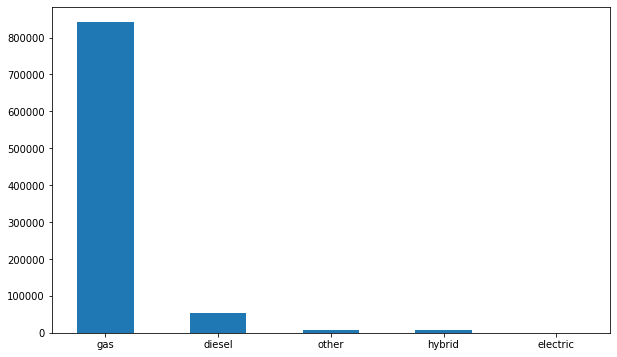

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(cars.fuel.value_counts().keys(), cars.fuel.value_counts(), width=0.5)

In [27]:
print("Number of NaN values: ", calculate_cars_nan_values().fuel)

Number of NaN values:  59


In [28]:
cars.fuel.describe()

count     908919
unique         5
top          gas
freq      841630
Name: fuel, dtype: object

In [29]:
cars.fuel.value_counts()

gas         841630
diesel       52501
other         7064
hybrid        6939
electric       785
Name: fuel, dtype: int64

There is single dominant value: 'gas'.<br>
NaN values will be replace with 'gas' later.

###### Feature: odometer

In [30]:
print("Number of NaN values: ", calculate_cars_nan_values().odometer)

Number of NaN values:  191458


In [31]:
cars.odometer.describe()

count    7.175200e+05
mean     1.196126e+05
std      1.381491e+05
min      0.000000e+00
25%      6.649200e+04
50%      1.147015e+05
75%      1.586090e+05
max      1.000000e+07
Name: odometer, dtype: float64

It's numeric data type. That's allow to deal with nan values later(e.g. fill with median of existing values).

###### Feature: title_status

<BarContainer object of 6 artists>

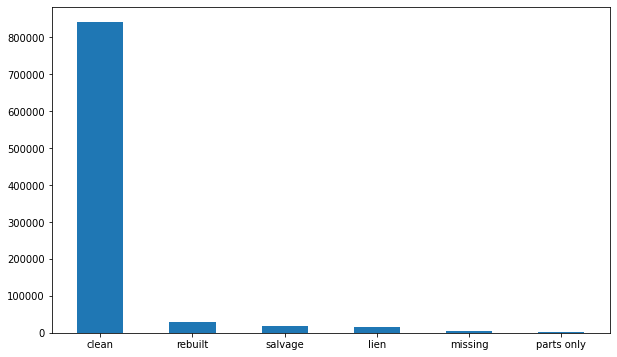

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(cars.title_status.value_counts().keys(), cars.title_status.value_counts(), width=0.5)

In [33]:
print("Number of NaN values: ", calculate_cars_nan_values().title_status)

Number of NaN values:  3


In [34]:
cars.title_status.describe()

count     908975
unique         6
top        clean
freq      840711
Name: title_status, dtype: object

In [35]:
cars.title_status.value_counts()

clean         840711
rebuilt        29875
salvage        17672
lien           15613
missing         3675
parts only      1429
Name: title_status, dtype: int64

There are only 3 NaN values.<br>
Rows with NaN values will be dropped.

In [36]:
cars.dropna(subset=['title_status'], inplace=True)

###### Feature: transmission

<BarContainer object of 3 artists>

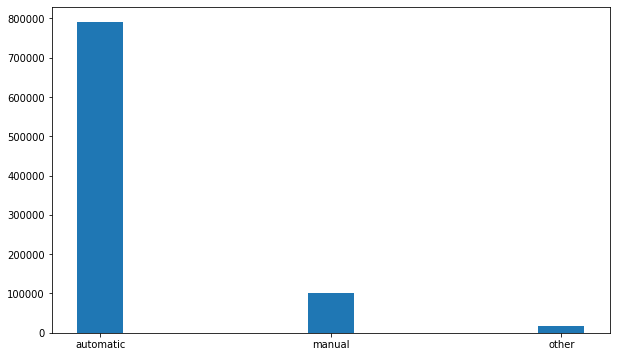

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(cars.transmission.value_counts().keys(), cars.transmission.value_counts(), width=0.2)

In [38]:
print("Number of NaN values: ", calculate_cars_nan_values().transmission)

Number of NaN values:  218


In [39]:
cars.transmission.describe()

count        908757
unique            3
top       automatic
freq         790397
Name: transmission, dtype: object

In [40]:
cars.transmission.value_counts()

automatic    790397
manual       101201
other         17159
Name: transmission, dtype: int64

There is single dominant value: 'automatic'.<br>
NaN values will be replace with 'automatic' later.

###### Feature: drive

<BarContainer object of 3 artists>

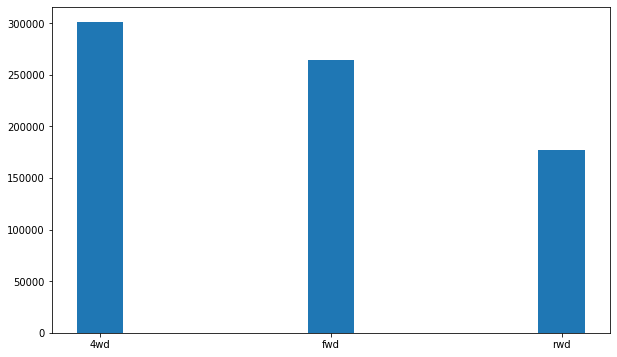

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(cars.drive.value_counts().keys(), cars.drive.value_counts(), width=0.2)


In [42]:
print("Number of NaN values: ", calculate_cars_nan_values().drive)

Number of NaN values:  167108


In [43]:
cars.drive.describe()

count     741867
unique         3
top          4wd
freq      300830
Name: drive, dtype: object

In [44]:
cars.drive.value_counts()

4wd    300830
fwd    264069
rwd    176968
Name: drive, dtype: int64

There is no single dominant value. Can't fill missing values base on other features.<br>
Too many NaN values, column will be dropped.

In [45]:
cars = cars.drop(columns='drive')

###### Feature: size

<BarContainer object of 4 artists>

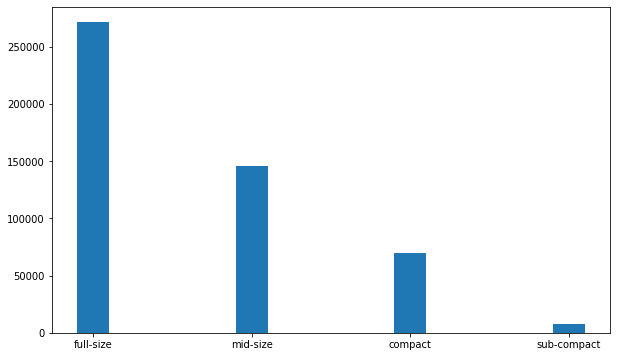

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(cars['size'].value_counts().keys(), cars['size'].value_counts(), width=0.2)

In [47]:
print("Number of NaN values: ", calculate_cars_nan_values()['size'])

Number of NaN values:  414350


In [48]:
cars['size'].describe()

count        494625
unique            4
top       full-size
freq         271313
Name: size, dtype: object

In [49]:
cars['size'].value_counts()

full-size      271313
mid-size       146019
compact         69737
sub-compact      7556
Name: size, dtype: int64

There is no single dominant value. Can't fill missing values base on other features.<br>
Too many NaN values, column will be dropped.

In [50]:
cars = cars.drop(columns='size')

###### Feature: type

<BarContainer object of 13 artists>

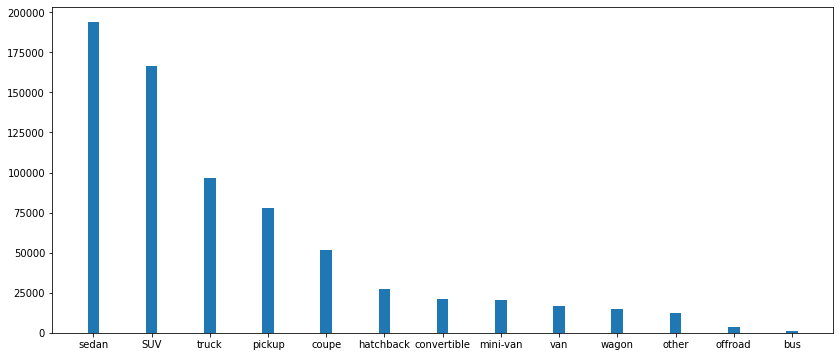

In [51]:
plt.figure(figsize=(14, 6))
plt.bar(cars.type.value_counts().keys(), cars.type.value_counts(), width=0.2)

In [52]:
print("Number of NaN values: ", calculate_cars_nan_values().type)

Number of NaN values:  204053


In [53]:
cars.type.describe()

count     704922
unique        13
top        sedan
freq      193830
Name: type, dtype: object

In [54]:
cars.type.value_counts()

sedan          193830
SUV            166788
truck           96721
pickup          77603
coupe           51780
hatchback       27453
convertible     20833
mini-van        20760
van             16832
wagon           14705
other           12667
offroad          3919
bus              1031
Name: type, dtype: int64

There is no single dominant value. Can't fill missing values base on other features.<br>
Too many NaN values, column will be dropped.

In [55]:
cars = cars.drop(columns='type')

In [56]:
cars

,price,year,manufacturer,make,condition,fuel,odometer,title_status,transmission
0,11900,2010.0,dodge,challenger se,good,gas,43600.0,clean,automatic
3,2800,2004.0,ford,taurus,good,gas,168591.0,clean,automatic
5,9900,2007.0,gmc,yukon,good,gas,169000.0,clean,automatic
6,12500,2015.0,jeep,patriot high altitude,like new,gas,39500.0,rebuilt,automatic
9,12995,2003.0,ford,excursion,excellent,gas,236000.0,clean,automatic
...,...,...,...,...,...,...,...,...,...
1723058,33000,1957.0,chevy,belair,excellent,gas,11000.0,clean,manual
1723059,69500,2013.0,ford,f350,like new,diesel,155556.0,salvage,automatic
1723061,6000,2005.0,chevy,avalanche,good,gas,NaN,clean,automatic
1723063,4788,2009.0,toyota,camry,good,gas,210682.0,clean,automatic


In [57]:
cars_nan_values_percent = calculate_cars_nan_values_percent()
pd.DataFrame({'NaN values [%]' : round(cars_nan_values_percent, 2), 'Data type': cars.dtypes})

,NaN values [%],Data type
price,0.00,int64
year,0.00,float64
manufacturer,0.00,object
make,0.00,object
condition,0.00,object
fuel,0.01,object
odometer,21.06,float64
title_status,0.00,object
transmission,0.02,object


### Numeric data cleaning

In [58]:
cars.head()

,price,year,manufacturer,make,condition,fuel,odometer,title_status,transmission
0,11900,2010.0,dodge,challenger se,good,gas,43600.0,clean,automatic
3,2800,2004.0,ford,taurus,good,gas,168591.0,clean,automatic
5,9900,2007.0,gmc,yukon,good,gas,169000.0,clean,automatic
6,12500,2015.0,jeep,patriot high altitude,like new,gas,39500.0,rebuilt,automatic
9,12995,2003.0,ford,excursion,excellent,gas,236000.0,clean,automatic


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae1909db38>,
      dtype=object)

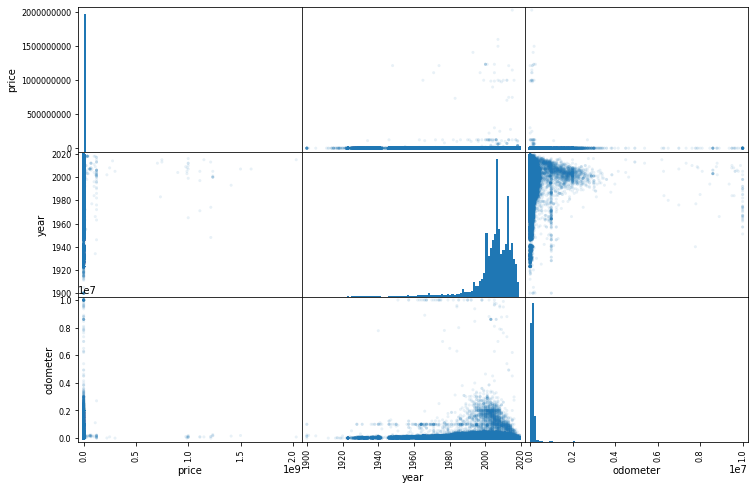

In [59]:
from pandas.plotting import scatter_matrix

attr = ['price', 'year', 'odometer']
scatter_matrix(cars[attr], figsize=(12, 8), alpha=0.1, hist_kwds={'bins': 100})

In [60]:
corr_before_cleaning = cars.corr()['price']

Scatter matrix show that outlier values must be remove.

###### Price

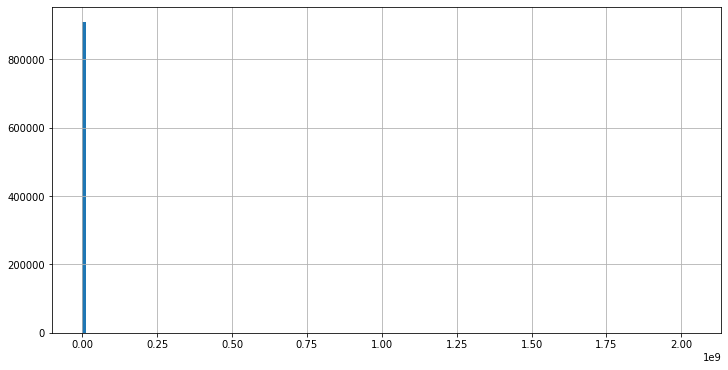

In [61]:
cars['price'].hist(bins=150, figsize=(12, 6))

Number of price higher than 100000:  996
Number of price lower than 500:  17559


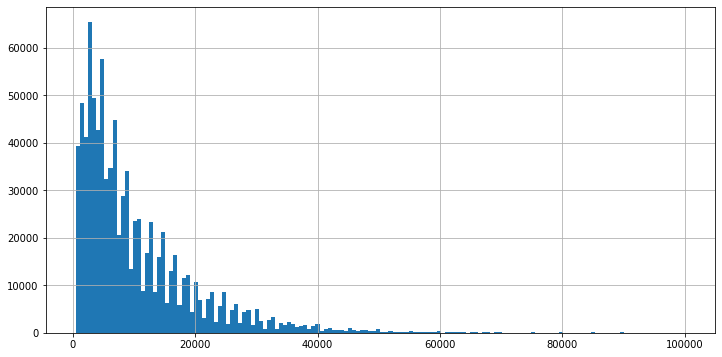

In [62]:
cars['price'][(cars['price'] < 100001) & (cars['price'] > 499)].hist(bins=150, figsize=(12, 6))

print('Number of price higher than 100000: ', len(cars['price'][cars['price'] > 100000]))
print('Number of price lower than 500: ', len(cars['price'][cars['price'] < 500]))

Rows with price higher than 100000, and lower than 500 will be dropped.

In [63]:
cars = cars[cars.price < 100001]
cars = cars[cars.price > 499]

###### Odometer

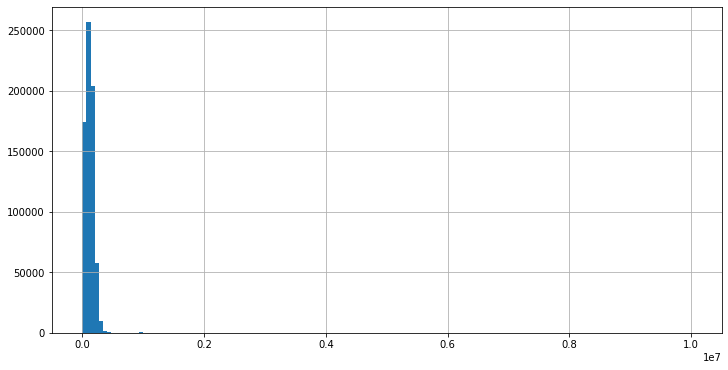

In [64]:
cars['odometer'].hist(bins=150, figsize=(12, 6))

Number of odometer higher than 300000:  6568
Number of odometer lower than 50:  5246


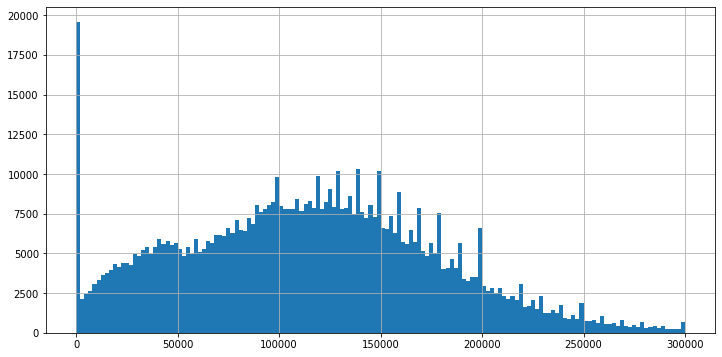

In [65]:
cars['odometer'][(cars['odometer'] < 300001) & (cars['odometer'] > 49)].hist(bins=150, figsize=(12, 6))

print('Number of odometer higher than 300000: ', len(cars['odometer'][cars['odometer'] > 300000]))
print('Number of odometer lower than 50: ', len(cars['odometer'][cars['odometer'] < 50]))

Rows with odometer higher than 500000, and lower than 50 will be dropped.

In [66]:
cars = cars[cars.odometer < 300001]
cars = cars[cars.odometer > 49]

###### Year

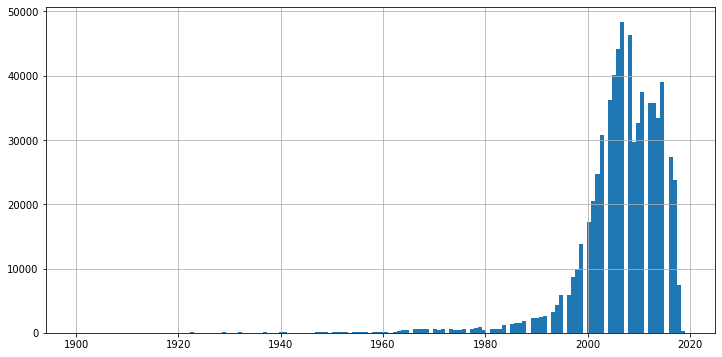

In [67]:
cars['year'].hist(bins=150, figsize=(12, 6))

Number of year lower than 1980:  11926


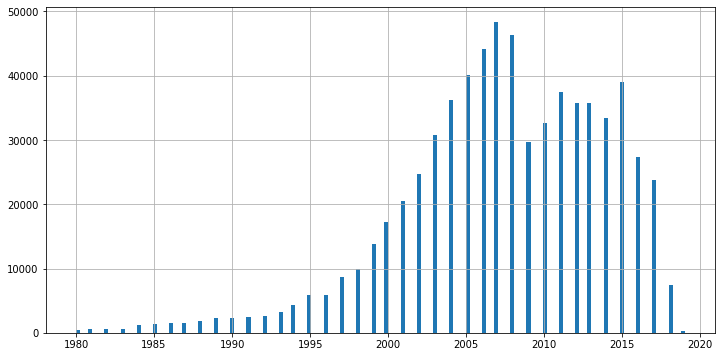

In [68]:
cars['year'][cars['year'] > 1979].hist(bins=150, figsize=(12, 6))

print('Number of year lower than 1980: ', len(cars['year'][cars['year'] < 1980]))

Rows with year lower than 1960 will be dropped.

In [69]:
cars = cars[cars.year > 1979]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae1ba6e518>,
      dtype=object)

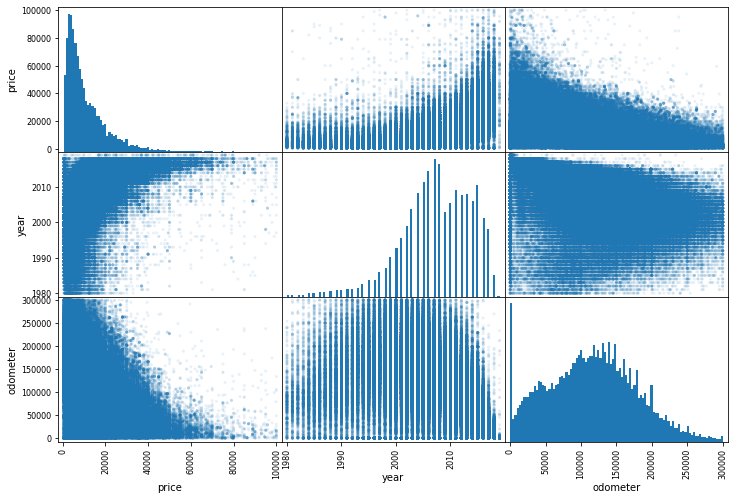

In [70]:
scatter_matrix(cars[attr], figsize=(12, 8), alpha=0.1, hist_kwds={'bins': 100})

In [71]:
corr_after_cleaning = cars.corr()['price']

In [72]:
print("Correlation coefficients for 'price' before cleaning:\n", corr_before_cleaning[['year', 'odometer']], '\n')
print("Correlation coefficients for 'price' after cleaning:\n", corr_after_cleaning[['year', 'odometer']])


Correlation coefficients for 'price' before cleaning:
 year       -0.002789
odometer   -0.000116
Name: price, dtype: float64 

Correlation coefficients for 'price' after cleaning:
 year        0.569555
odometer   -0.496743
Name: price, dtype: float64


After numeric data cleaning significant increace of correlation coefficient can be observed.<br>

### Cleaning of 'manufacturer' and 'make'

###### Manufacturer

In [73]:
cars['manufacturer'].unique()

array(['dodge', 'ford', 'gmc', 'jeep', 'chev', 'hyundai', 'honda', 'ram',
       'acura', 'bmw', 'volkswagen', 'cadillac', 'rover', 'mercedes',
       'nissan', 'chevy', 'infiniti', 'toyota', 'chevrolet', 'kia',
       'saturn', 'chrysler', 'lincoln', 'mitsubishi', 'buick', 'lexus',
       'mercury', 'fiat', 'audi', 'mazda', 'subaru', 'mini', 'pontiac',
       'volvo', 'vw', 'jaguar', 'mercedes-benz', 'infinity', 'alfa',
       'harley', 'datsun', 'porche', 'ferrari', 'landrover',
       'harley-davidson', 'land rover', 'aston-martin', 'aston',
       'alfa-romeo', 'hennessey', 'mercedesbenz', 'morgan'], dtype=object)

Only elements with correct 'manufacturer' values can be used to train models.<br>
'Manufacturer' will be compare with data from library vehicle-makes.

In [74]:
from vehicle_makes import get_makes_and_models
import numpy as np

makes_and_models = get_makes_and_models()
makes_and_models = {model.lower(): set(ele.lower() for ele in make) for model, make in makes_and_models.items()}
manufacturer_set = makes_and_models.keys()
cars['manufacturer'] = cars['manufacturer'].apply(lambda ele: ele.lower())
unique_manufacturer = set(cars['manufacturer'].unique())
unique_manufacturer = unique_manufacturer.intersection(manufacturer_set)
cars = cars[cars["manufacturer"].isin(unique_manufacturer)]

##### Make

In [75]:
unique_make_before_preprocessing = len(cars['make'].unique())

In [76]:
cars['make'][:50]

0              challenger se
3                     taurus
5                      yukon
6      patriot high altitude
9                  excursion
12                    sonata
14               santa fe xl
16                  cr-v exl
19                    x1 28i
26           odyssey touring
27                elantra gt
29                   touareg
31                   odyssey
99                       cts
105              discovery 2
111                     350z
115                   rabbit
122                     m35x
129              camry le v6
132                excursion
140                  insight
142         1 ton dump truck
144                 explorer
150               ranger xlt
151                 cavalier
155                    f-250
167                  elantra
170                   fusion
171                     f250
172                   fusion
173                     f150
176      sorento sxl limited
177                 f150 4x4
178              sierra 1500
180           

There are too many unique values.<br>
For each row in data set will be checked that the manufacturer has a given make of car, and make name will be simplify.

In [77]:
cars_list = cars[['manufacturer', 'make']].values
makes_list = [np.nan] * len(cars_list)

for index, [manufacturer, make] in enumerate(cars_list):
    for ele in makes_and_models[manufacturer]:
        if ele in make:
            makes_list[index] = ele
            continue
cars.drop(columns=['make'])
cars = cars.assign(make = makes_list)
cars.dropna(subset=['make'], inplace=True)

In [78]:
unique_make_after_preprocessing = len(cars['make'].unique())
print("Number of unique make before preprocessing: ", unique_make_before_preprocessing)
print("Number of unique make after preprocessing: ", unique_make_after_preprocessing)

Number of unique make before preprocessing:  31683
Number of unique make after preprocessing:  371


Keeping the elements where unique make occuring more than 20 times.

In [79]:
using_makes = {make for make, count in cars.make.value_counts().items() if count > 20}

In [80]:
cars = cars[cars["make"].isin(using_makes)]

### Addicional data cleaning

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae17db8518>,
      dtype=object)

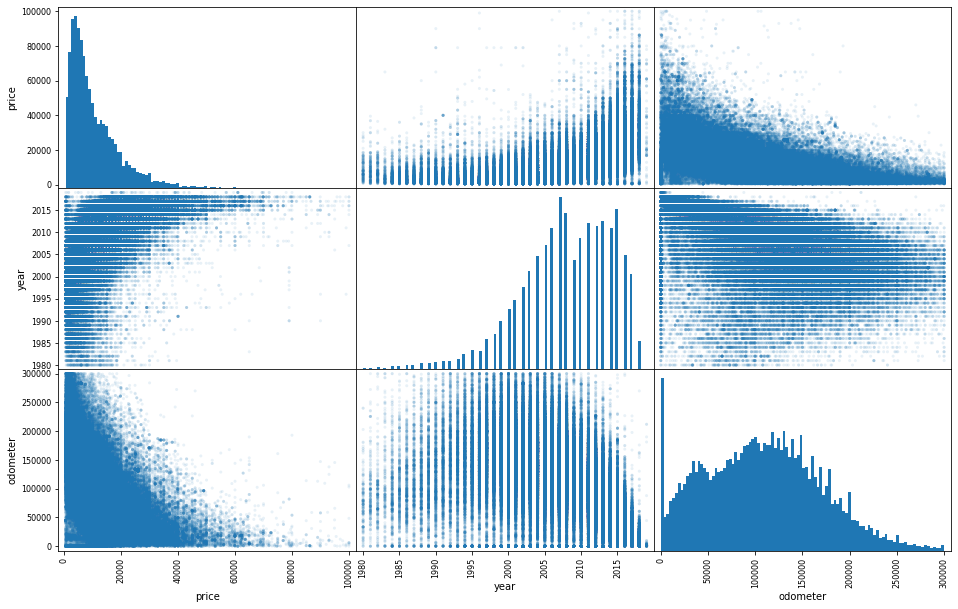

In [81]:
scatter_matrix(cars[attr], figsize=(16, 10), alpha=0.1, hist_kwds={'bins': 100})

In [82]:
cars = cars[cars.odometer > 3000]
cars = cars[cars.price > 1000]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae145179e8>,
      dtype=object)

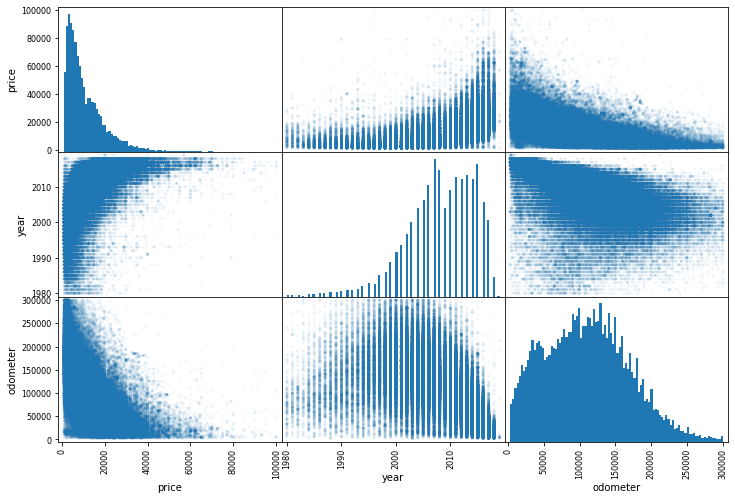

In [83]:
scatter_matrix(cars[attr], figsize=(12, 8), alpha=0.05, hist_kwds={'bins': 100})

In [84]:
cars.corr()['price']

price       1.000000
year        0.563838
odometer   -0.592145
Name: price, dtype: float64

# 2. Split data to train and test set

In [85]:
from sklearn.model_selection import train_test_split

cars_train, cars_test = train_test_split(cars, test_size=0.2, random_state=42)
x_train = cars_train.drop(columns='price')
x_test = cars_test.drop(columns='price')
y_train = cars_train['price'].values
y_test = cars_test['price'].values

In [86]:
x_train

,year,manufacturer,make,condition,fuel,odometer,title_status,transmission
139511,2006.0,mazda,tribute,like new,gas,144000.0,clean,automatic
777015,2010.0,dodge,charger,excellent,gas,100000.0,salvage,automatic
1673691,2007.0,jeep,wrangler,excellent,gas,83984.0,clean,manual
856139,2015.0,toyota,rav4,good,gas,28556.0,clean,automatic
209642,1999.0,toyota,corolla,good,gas,214000.0,clean,automatic
...,...,...,...,...,...,...,...,...
697958,2003.0,ford,expedition,excellent,gas,157000.0,clean,automatic
1511687,2013.0,chevrolet,cruze,good,gas,66792.0,clean,automatic
763624,2010.0,audi,a4,like new,gas,144000.0,clean,automatic
835304,2009.0,dodge,journey,excellent,gas,126000.0,clean,automatic


# 3. Pipelines

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

### Numerical pipeline

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_attribs = {'year', 'odometer'}

num_pipeline = Pipeline([
    ('data_selector', DataFrameSelector(num_attribs)),
    ('num_imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler()),
])

### Categorical pipeline

In [89]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_attribs = set(x_train.keys()) - num_attribs

cat_pipeline = Pipeline([
    ('data_selector', DataFrameSelector(cat_attribs)),
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder()),
    ('one_hot_encoder', OneHotEncoder()),
])

### Concatenation of pipelines results

In [90]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

x_train_prepared = full_pipeline.fit_transform(x_train, y_train)

### Dimensionality reduction

In [91]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95)
pca = PCA(n_components=77, random_state=40)
x_train_reduced = pca.fit_transform(x_train_prepared.toarray())

In [92]:
x_t = pca.fit_transform(x_train_prepared.toarray())

In [93]:
print("Size of sampel before dimensionality reduction: ", len(x_train_prepared.toarray()[0]))
print("Size of sampel after dimensionality reduction: ", len(x_train_reduced[0]))

Size of sampel before dimensionality reduction:  312
Size of sampel after dimensionality reduction:  77


# 4. Model selections

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from joblib import dump, load

def display_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Std: ", scores.std())
    
def calculate_rmse(labels, predictions):
    mse = mean_squared_error(labels, predictions)
    return np.sqrt(mse)

def save_model(model):
    model_name = str(model) 
    dump(model, os.path.join('models_x_reduced', model_name + '.pkl'))

### Linear regression

In [95]:
# from sklearn.linear_model import LinearRegression

# lin_reg = LinearRegression()
# lin_reg.fit(x_train_reduced, y_train)
# lin_reg = load(os.path.join('models_x_reduced', 'LinearRegression().pkl'))

In [96]:
# car_predictions_lin = lin_reg.predict(x_train_reduced)
# print("RMSE: ", round(calculate_rmse(y_train, car_predictions_lin), 2))
# print("R^2 score: ", round(lin_reg.score(x_train_reduced, y_train), 2))
# print("MAE: ", round(mean_absolute_error(y_train, car_predictions_lin), 2))

In [97]:
# lin_scores = cross_val_score(lin_reg, x_train_reduced, y_train, scoring='neg_mean_squared_error', cv=3)
# lin_rmse_scores = np.sqrt(-lin_scores)
# display_scores(lin_rmse_scores)

In [98]:
# save_model(lin_reg)

### SGDRegressor

In [99]:
# from sklearn.linear_model import SGDRegressor

# sgd_reg = SGDRegressor()
# sgd_reg.fit(x_train_reduced, y_train)
# sgd_reg = load(os.path.join('models_x_reduced', 'SGDRegressor().pkl'))

In [100]:
# car_predictions_sgd = sgd_reg.predict(x_train_reduced)
# print("RMSE: ", round(calculate_rmse(y_train, car_predictions_sgd), 2))
# print("R^2 score: ", round(sgd_reg.score(x_train_reduced, y_train), 2))
# print("MAE: ", round(mean_absolute_error(y_train, car_predictions_sgd), 2))

In [101]:
# sgd_scores = cross_val_score(sgd_reg, x_train_reduced, y_train, scoring='neg_mean_squared_error', cv=3)
# sgd_rmse_scores = np.sqrt(-sgd_scores)
# display_scores(sgd_rmse_scores)

In [102]:
# save_model(sgd_reg)

### Lasso

In [103]:
# from sklearn.linear_model import Lasso

# lasso_reg = Lasso(alpha=1)
# lasso_reg.fit(x_train_reduced, y_train)
# lasso_reg = load(os.path.join('models_x_reduced', 'Lasso(alpha=1).pkl'))

In [104]:
# car_predictions_lasso = lasso_reg.predict(x_train_reduced)
# print("RMSE: ", round(calculate_rmse(y_train, car_predictions_lasso), 2))
# print("R^2 score: ", round(lasso_reg.score(x_train_reduced, y_train), 2))
# print("MAE: ", round(mean_absolute_error(y_train, car_predictions_lasso), 2))

In [105]:
# lasso_scores = cross_val_score(lasso_reg, x_train_reduced, y_train, scoring='neg_mean_squared_error', cv=3)
# lasso_rmse_scores = np.sqrt(-lasso_scores)
# display_scores(lasso_rmse_scores)

In [106]:
# save_model(lasso_reg)

### LinearSVR

In [107]:
# from sklearn.svm import LinearSVR

# lsvr_reg = LinearSVR(C=100)
# lsvr_reg.fit(x_train_reduced, y_train)
# lsvr_reg = load(os.path.join('models_x_reduced', 'LinearSVR(C=100).pkl'))

In [108]:
# car_predictions_lsvr = lsvr_reg.predict(x_train_reduced)
# print("RMSE: ", round(calculate_rmse(y_train, car_predictions_lsvr), 2))
# print("R^2 score: ", round(lsvr_reg.score(x_train_reduced, y_train), 2))
# print("MAE: ", round(mean_absolute_error(y_train, car_predictions_lsvr), 2))

In [109]:
# lsvr_scores = cross_val_score(lsvr_reg, x_train_reduced, y_train, scoring='neg_mean_squared_error', cv=3)
# lsvr_rmse_scores = np.sqrt(-lsvr_scores)
# display_scores(lsvr_rmse_scores)

In [110]:
# save_model(lsvr_reg)

### Decision tree

In [111]:
# from sklearn.tree import DecisionTreeRegressor

# tree_reg = DecisionTreeRegressor(random_state=42)
# tree_reg.fit(x_train_reduced, y_train)
# tree_reg = load(os.path.join('models_x_reduced', 'DecisionTreeRegressor(random_state=42).pkl'))

In [112]:
# car_predictions_tree = tree_reg.predict(x_train_reduced)
# print("RMSE: ", round(calculate_rmse(y_train, car_predictions_tree), 2))
# print("R^2 score: ", round(tree_reg.score(x_train_reduced, y_train), 2))
# print("MAE: ", round(mean_absolute_error(y_train, car_predictions_tree), 2))

In [113]:
# tree_scores = cross_val_score(tree_reg, x_train_reduced, y_train, scoring='neg_mean_squared_error', cv=3)
# tree_rmse_scores = np.sqrt(-tree_scores)
# display_scores(tree_rmse_scores)

In [114]:
# save_model(tree_reg)

### Random forest

##### Forest ( 5 trees)

In [115]:
# from sklearn.ensemble import RandomForestRegressor

# forest5_reg = RandomForestRegressor(n_estimators=5, random_state=42)
# forest5_reg.fit(x_train_reduced, y_train)
# forest5_reg = load(os.path.join('models_x_reduced',
#                                 'RandomForestRegressor(n_estimators=5, random_state=42).pkl'))

In [116]:
# from sklearn.model_selection import GridSearchCV

# grid_params = [
#     {'min_samples_leaf': [5, 10], 'max_depth': [20, 30]}
# ]

# grid_forest_reg = RandomForestRegressor(n_estimators=5, random_state=42)
# grid_search = GridSearchCV(grid_forest_reg, grid_params, cv=3, scoring='neg_mean_squared_error')
# grid_search.fit(x_train_reduced, y_train)
# grid_search.best_params_

In [117]:
# car_predictions_forest5 = forest5_reg.predict(x_train_reduced)
# print("RMSE: ", round(calculate_rmse(y_train, car_predictions_forest5), 2))
# print("R^2 score: ", round(forest5_reg.score(x_train_reduced, y_train), 2))
# print("MAE: ", round(mean_absolute_error(y_train, car_predictions_forest5), 2))

In [118]:
# forest5_scores = cross_val_score(forest5_reg, x_train_reduced, y_train, scoring='neg_mean_squared_error', cv=3)
# forest5_rmse_scores = np.sqrt(-forest5_scores)
# display_scores(forest5_rmse_scores)

In [119]:
# save_model(forest5_reg)

##### Forest ( 10 trees)

In [120]:
# from sklearn.ensemble import RandomForestRegressor

# forest10_reg = RandomForestRegressor(n_estimators=10, random_state=42)
# forest10_reg.fit(x_train_reduced, y_train)
# forest10_reg = load(os.path.join('models_x_reduced',
#                                  'RandomForestRegressor(n_estimators=10, random_state=42).pkl'))

In [121]:
# car_predictions_forest10 = forest10_reg.predict(x_train_reduced)
# print("RMSE: ", round(calculate_rmse(y_train, car_predictions_forest10), 2))
# print("R^2: ", round(forest10_reg.score(x_train_reduced, y_train), 2))
# print("MAE: ", round(mean_absolute_error(y_train, car_predictions_forest10), 2))

In [122]:
# forest10_scores = cross_val_score(forest10_reg, x_train_reduced, y_train, scoring='neg_mean_squared_error', cv=3)
# forest10_rmse_scores = np.sqrt(-forest10_scores)
# display_scores(forest10_rmse_scores)

In [123]:
# save_model(forest10_reg)

##### Forest ( 20 trees)

In [124]:
from sklearn.ensemble import RandomForestRegressor

forest20_reg = RandomForestRegressor(n_estimators=20, max_depth=30, min_samples_leaf=5, random_state=42)
forest20_reg.fit(x_train_reduced, y_train)
# forest20_reg = load(os.path.join('models_x_reduced', 'best_model.pkl'))

RandomForestRegressor(max_depth=30, min_samples_leaf=5, n_estimators=20,
                      random_state=42)

In [125]:
# car_predictions_forest20 = forest20_reg.predict(x_train_reduced)
# print("RMSE: ", round(calculate_rmse(y_train, car_predictions_forest20), 2))
# print("R^2: ", round(forest20_reg.score(x_train_reduced, y_train), 2))
# print("MAE: ", round(mean_absolute_error(y_train, car_predictions_forest20), 2))

In [126]:
# forest20_scores = cross_val_score(forest20_reg, x_train_reduced, y_train, scoring='neg_mean_squared_error', cv=3)
# forest20_rmse_scores = np.sqrt(-forest20_scores)
# display_scores(forest20_rmse_scores)

In [127]:
# save_model(forest20_reg)

# 5. Model evaluation


In [128]:
model = forest20_reg

car_predictions = model.predict(x_train_reduced)
print("RMSE: ", round(calculate_rmse(y_train, car_predictions), 2))
print("R^2: ", round(model.score(x_train_reduced, y_train), 2))
print("MAE: ", round(mean_absolute_error(y_train, car_predictions), 2))

RMSE:  2139.36
R^2:  0.95
MAE:  1119.71


In [129]:
x_test_prepared = full_pipeline.transform(x_test)
x_test_reduced = pca.transform(x_test_prepared.toarray())

car_predictions_test = model.predict(x_test_reduced)
print("Test RMSE: ", round(calculate_rmse(y_test, car_predictions_test), 2))
print("Test R^2: ", round(model.score(x_test_reduced, y_test), 2))
print("Test MAE: ", round(mean_absolute_error(y_test, car_predictions_test), 2))

Test RMSE:  3370.89
Test R^2:  0.86
Test MAE:  1938.95
